In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions
import h5py
from tensorflow.keras.layers import Input,GlobalAveragePooling2D,Dense,Flatten,GlobalMaxPooling2D
from tensorflow.keras.models import Model,Sequential

E:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#Now loading the data using the h5py file
testFileName="test_catvnoncat.h5"
fileTest=h5py.File(testFileName,"r")
trainFileName="train_catvnoncat.h5"
fileTrain=h5py.File(trainFileName,"r")
X_test=fileTest["test_set_x"].value
Y_test=fileTest["test_set_y"].value
listclass=fileTest["list_classes"].value
X_train=fileTrain["train_set_x"].value
Y_train=fileTrain["train_set_y"].value
print("The total number of training examples are {}".format(X_train.shape[0]))
print("The total number of testing examples are {}".format(X_test.shape[0]))
print("The shape of Features for training set is {}".format(X_train.shape))
print("The shape of Labels for training set is {}".format(Y_train.shape))
print("The shape of Features for testing set is {}".format(X_test.shape))
print("The shape of Labels for testing set is {}".format(Y_test.shape))
print(listclass)

The total number of training examples are 209
The total number of testing examples are 50
The shape of Features for training set is (209, 64, 64, 3)
The shape of Labels for training set is (209,)
The shape of Features for testing set is (50, 64, 64, 3)
The shape of Labels for testing set is (50,)
[b'non-cat' b'cat']


In [3]:
base_model  = VGG16(weights='imagenet',include_top=False,input_shape=(64,64,3))
# add a global spatial average pooling layer
x = base_model.output
x = GlobalMaxPooling2D()(x)
#flatten = Flatten()
# let's add a fully-connected layer
x = Dense(64, activation='relu')(x)
# and a logistic layer -- let's say we have 1 classes
predictions = Dense(1, activation='sigmoid')(x)
# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)


In [4]:
for layer in base_model.layers:
    layer.trainable = False

In [5]:
model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(X_train,Y_train,batch_size=32,epochs=50,shuffle=True)

Epoch 1/50
209/209 [==============================] - 7s 35ms/step - loss: 5.2603
Epoch 2/50
209/209 [==============================] - 1s 6ms/step - loss: 2.3341
Epoch 3/50
209/209 [==============================] - 1s 6ms/step - loss: 1.3612
Epoch 4/50
209/209 [==============================] - 1s 6ms/step - loss: 0.7724
Epoch 5/50
209/209 [==============================] - 1s 6ms/step - loss: 0.3806
Epoch 6/50
209/209 [==============================] - 1s 6ms/step - loss: 0.1938
Epoch 7/50
209/209 [==============================] - 1s 6ms/step - loss: 0.1547
Epoch 8/50
209/209 [==============================] - 1s 6ms/step - loss: 0.1555
Epoch 9/50
209/209 [==============================] - 1s 6ms/step - loss: 0.1548
Epoch 10/50
209/209 [==============================] - 1s 6ms/step - loss: 0.1542
Epoch 11/50
209/209 [==============================] - 1s 6ms/step - loss: 0.1538
Epoch 12/50
209/209 [==============================] - 1s 6ms/step - loss: 0.1537
Epoch 13/50
209/209 [===

In [6]:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

0 input_1
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool


In [7]:
# Freeze the layers except the last 4 layers
for layer in model.layers[:-4]:
    layer.trainable = False

In [8]:
model.compile(optimizer="adam", loss='binary_crossentropy',metrics=["accuracy"])

In [9]:
model.fit(X_train,Y_train,epochs=30,shuffle=True,batch_size=32)

Epoch 1/30
209/209 [==============================] - 2s 8ms/step - loss: 0.1545 - acc: 0.9904A: 1s - loss: 0.2491 - acc: 0
Epoch 2/30
209/209 [==============================] - 1s 6ms/step - loss: 0.1534 - acc: 0.9904
Epoch 3/30
209/209 [==============================] - 1s 6ms/step - loss: 0.1535 - acc: 0.9904
Epoch 4/30
209/209 [==============================] - 1s 6ms/step - loss: 0.1534 - acc: 0.9904
Epoch 5/30
209/209 [==============================] - 1s 6ms/step - loss: 0.1534 - acc: 0.9904
Epoch 6/30
209/209 [==============================] - 1s 6ms/step - loss: 0.1534 - acc: 0.9904
Epoch 7/30
209/209 [==============================] - 1s 6ms/step - loss: 0.1534 - acc: 0.9904
Epoch 8/30
209/209 [==============================] - 1s 6ms/step - loss: 0.1534 - acc: 0.9904
Epoch 9/30
209/209 [==============================] - 1s 6ms/step - loss: 0.1534 - acc: 0.9904
Epoch 10/30
209/209 [==============================] - 1s 6ms/step - loss: 0.1534 - acc: 0.9904
Epoch 11/30
209/209 

In [10]:
model.evaluate(X_test,Y_test)

50/50 [==============================] - 2s 47ms/step


[1.6179353713989257, 0.8999999928474426]

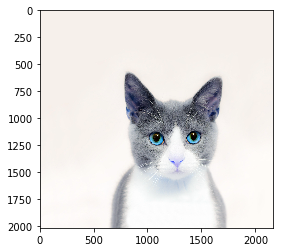

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
img=cv2.imread('cat.jpg')
plt.imshow(img)
plt.show()

In [22]:
import cv2
img = cv2.imread('cat.jpg')
newimg=cv2.resize(img,(64,64))
import numpy as np
newimg=np.expand_dims(newimg,axis=0)
newimg.shape

(1, 64, 64, 3)

In [23]:
predictions=["NonCat","Cat"]
predictions[int(model.predict(newimg)[0][0])]

'Cat'